<a href="https://colab.research.google.com/github/erickhp12/mnaTC4029-eda/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Erick Fernando Holguin Pardavell
*   MATRÍCULA: A01797412

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/"
os.chdir(DIR)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [46]:
df.isna().sum() / len(df) * 100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_int_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [33]:
include = ['float','int']
cols = df.describe(include=include)

for col in cols:
  media = cols[col].loc['mean']
  mediana = cols[col].loc['50%']
  min = cols[col].loc['min']
  max = cols[col].loc['max']
  std = cols[col].loc['std']
  q25 = cols[col].loc['25%']
  q50 = cols[col].loc['50%']
  q75 = cols[col].loc['75%']
  asimetria = cols[col].skew()
  curtosis = cols[col].kurtosis()
  print(f"Columna: {col} -------------------------------------------------------------------------------------------------")
  print(f"Media: {media} | Mediana: {mediana}")
  print(f"Min: {min} | Max: {max} | Desviacion: {std} | 25%: {q25} | 50%: {q50} | 75%: {q75}")
  print(f"Asimetria: {asimetria} | Curtosis: {curtosis}")
  print('\n')

Columna: person_age -------------------------------------------------------------------------------------------------
Media: 27.73459992019889 | Mediana: 26.0
Min: 20.0 | Max: 144.0 | Desviacion: 6.3480784192252475 | 25%: 23.0 | 50%: 26.0 | 75%: 30.0
Asimetria: 2.8283473906061434 | Curtosis: 7.999660798922873


Columna: person_income -------------------------------------------------------------------------------------------------
Media: 66074.84846996715 | Mediana: 55000.0
Min: 4000.0 | Max: 6000000.0 | Desviacion: 61983.119168159064 | 25%: 38500.0 | 50%: 55000.0 | 75%: 79200.0
Asimetria: 2.8277311188566028 | Curtosis: 7.997054527083561


Columna: person_emp_length -------------------------------------------------------------------------------------------------
Media: 4.789686296787225 | Mediana: 4.0
Min: 0.0 | Max: 123.0 | Desviacion: 4.142630148887972 | 25%: 2.0 | 50%: 4.0 | 75%: 7.0
Asimetria: 2.828348365500037 | Curtosis: 7.999664898327628


Columna: loan_amnt ---------------------

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

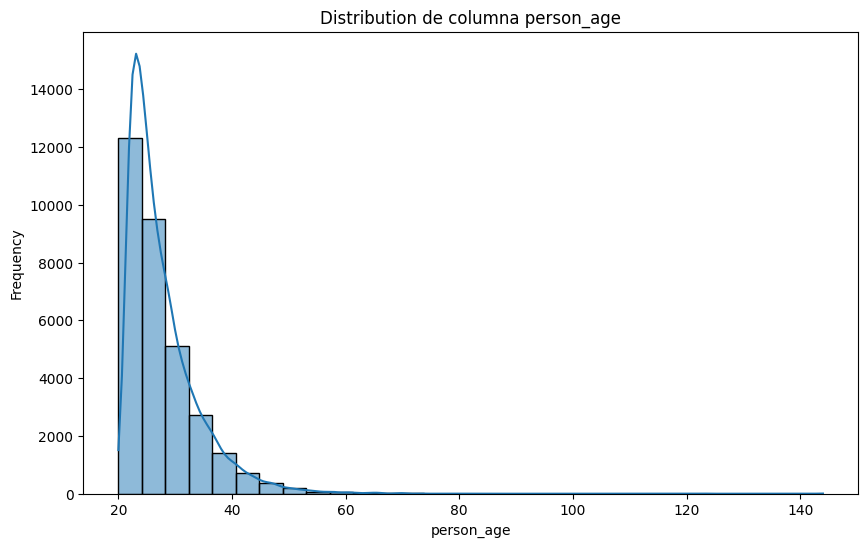

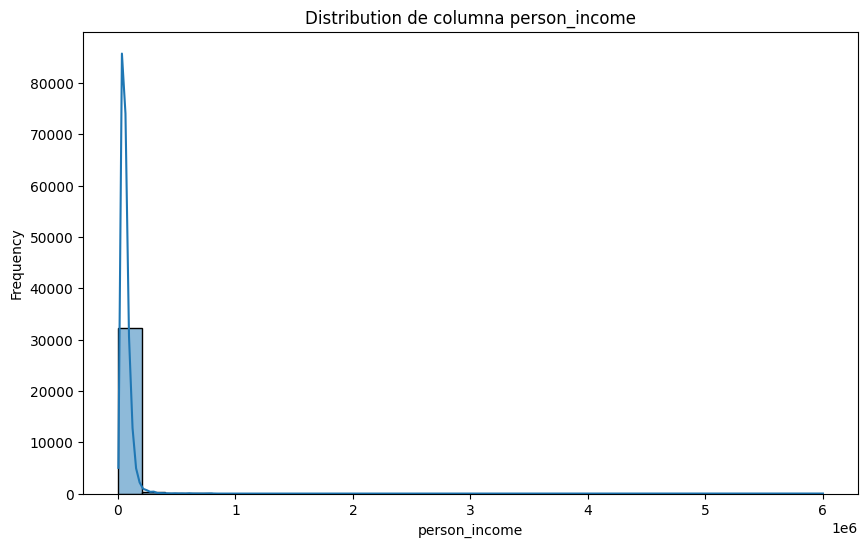

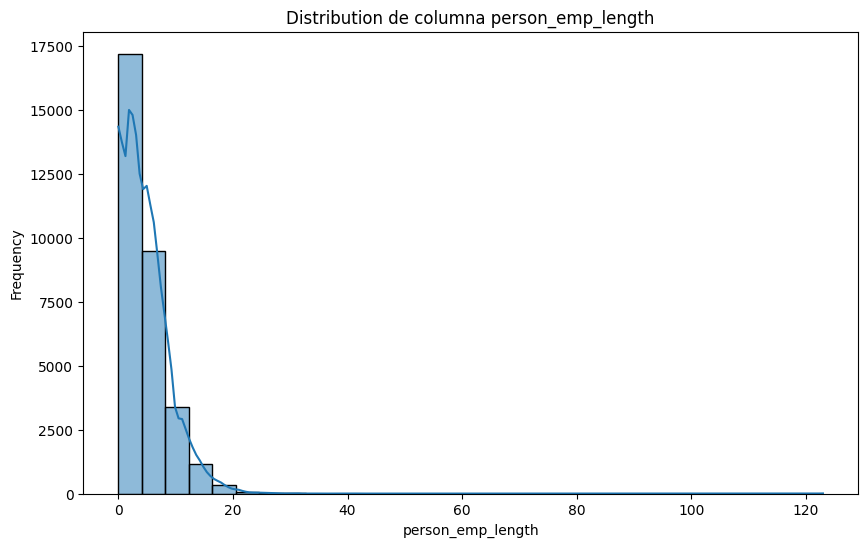

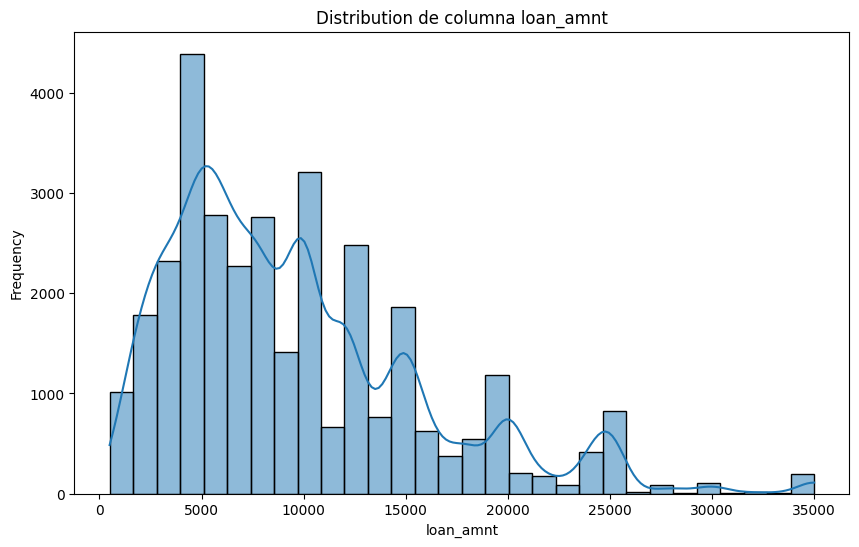

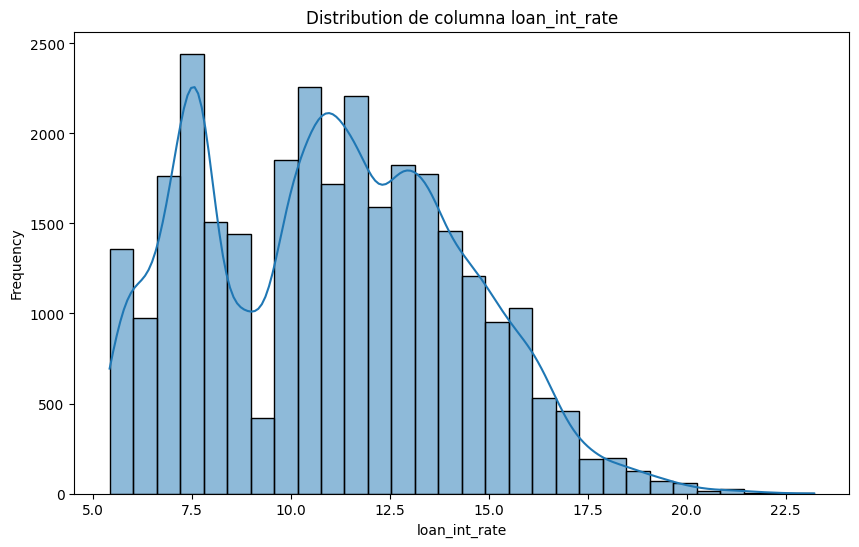

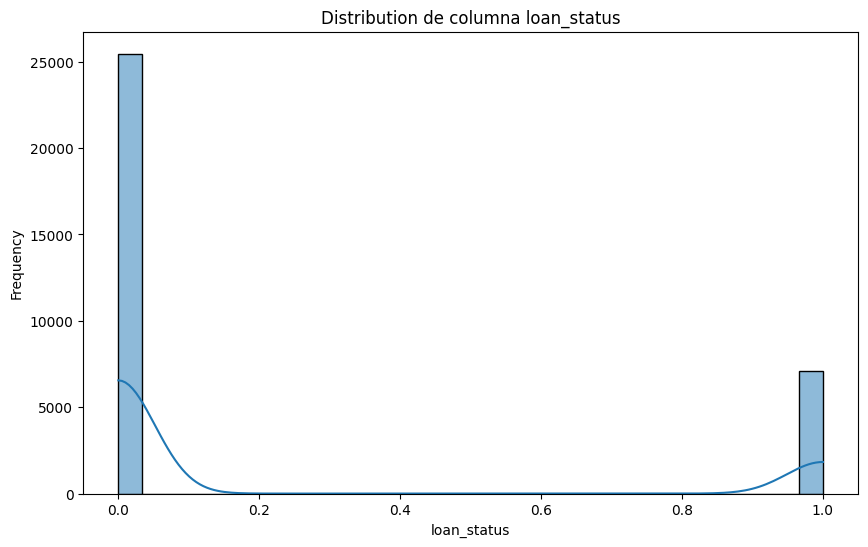

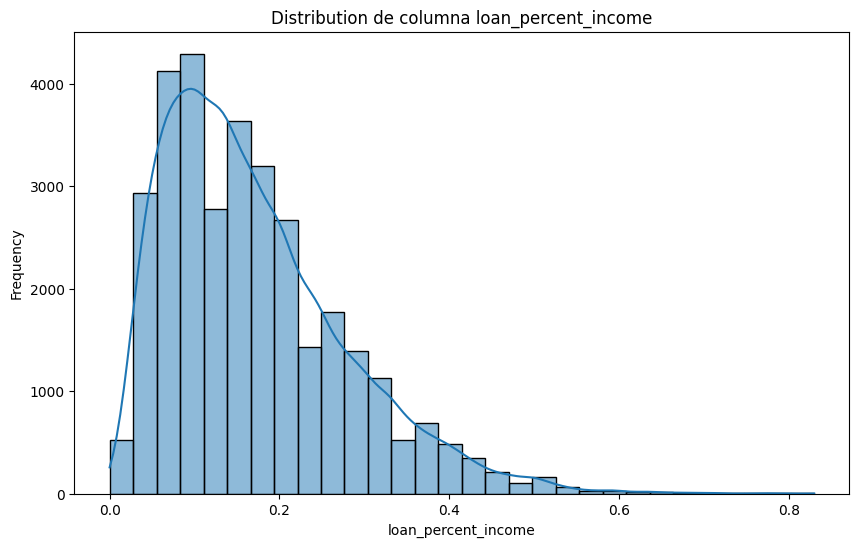

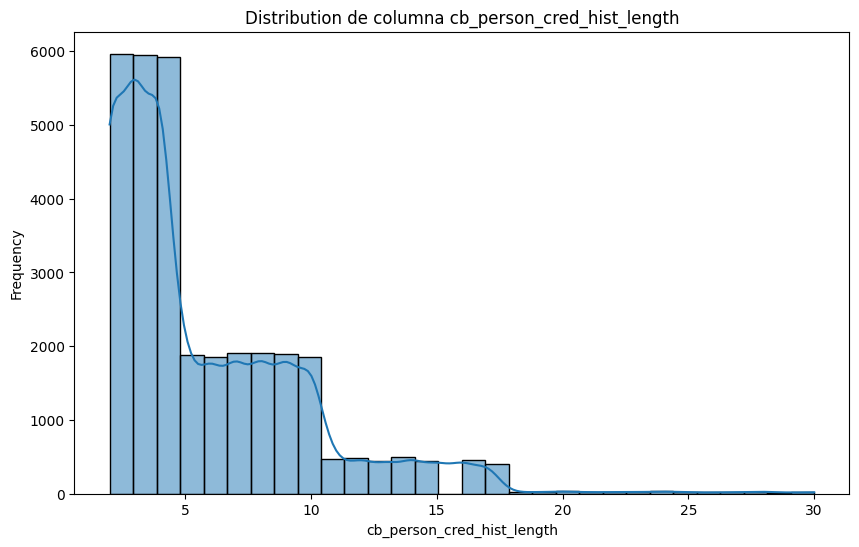

In [163]:
cols = df.select_dtypes(include=['float', 'int']).columns

for col in cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distribution de columna {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

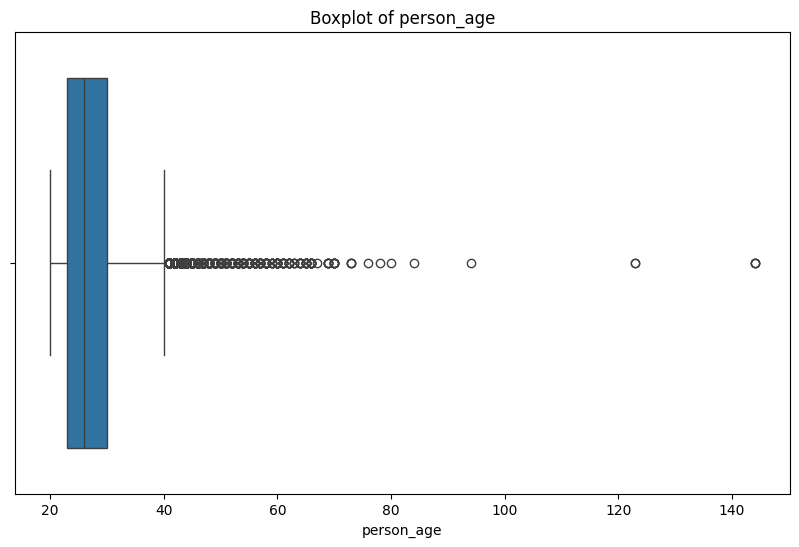

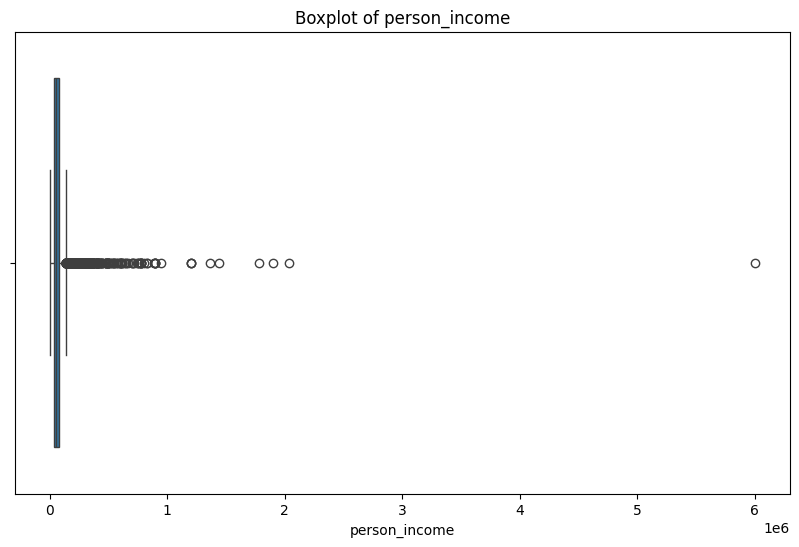

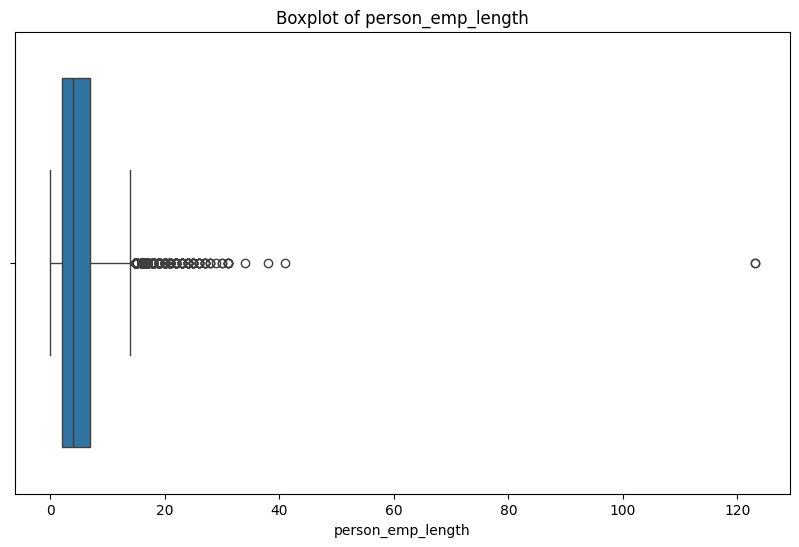

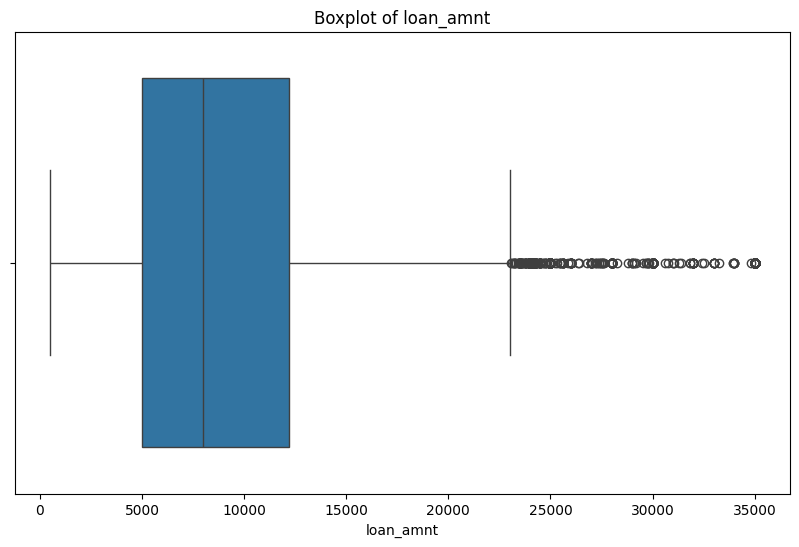

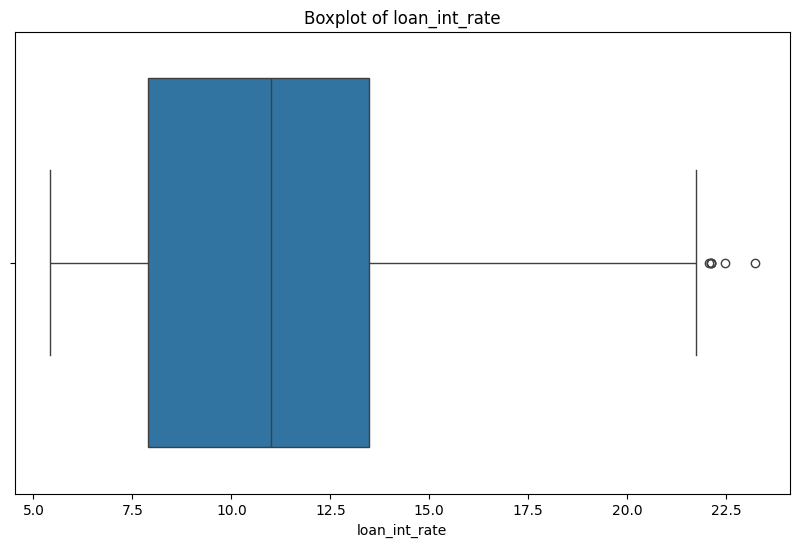

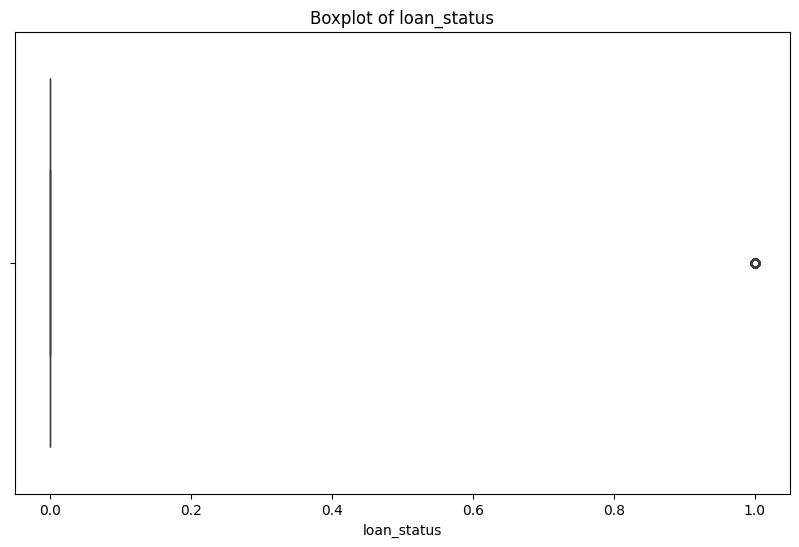

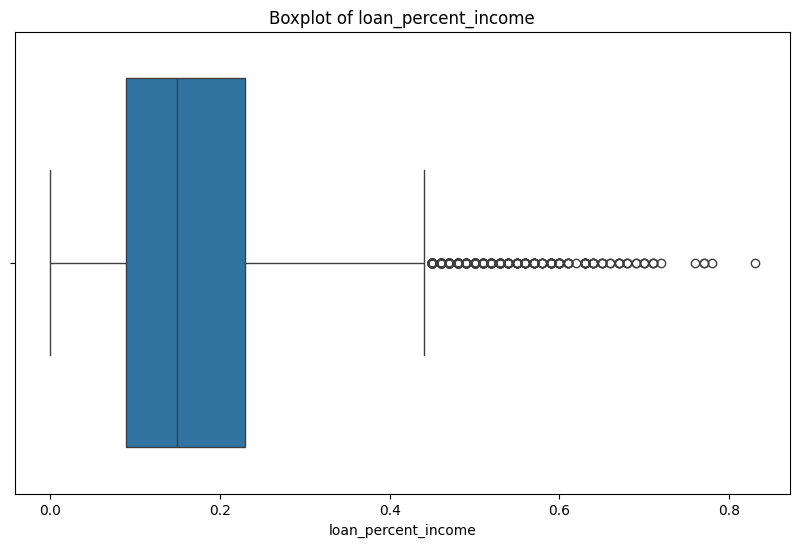

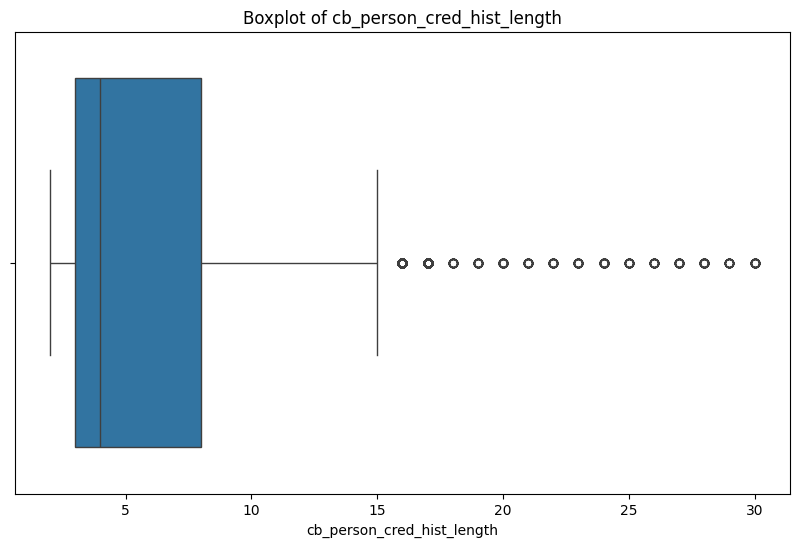

In [160]:
cols = df.select_dtypes(include=['float', 'int']).columns

for col in cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de columna {col}')
  plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [165]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [214]:
include = ['object']
text_cols = df.describe(include=include)

for col in text_cols:
  moda = text_cols[col].mode()
  cardinalidad = text_cols[col].value_counts()
  print(f"Columna: {[col]} -------------------------------------------------------------------------------------------------")
  print(f"Moda: {moda[2]}")
  print(f"Cardinalidad: {cardinalidad}")
  print(f"Recuentos: {df[col].value_counts()}")
  print('\n')

Columna: ['person_home_ownership'] -------------------------------------------------------------------------------------------------
Moda: RENT
Cardinalidad: person_home_ownership
32581    1
4        1
RENT     1
16446    1
Name: count, dtype: int64
Recuentos: person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


Columna: ['loan_intent'] -------------------------------------------------------------------------------------------------
Moda: EDUCATION
Cardinalidad: loan_intent
32581        1
6            1
EDUCATION    1
6453         1
Name: count, dtype: int64
Recuentos: loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


Columna: ['loan_grade'] -------------------------------------------------------------------------------------------------
Moda: A
Cardinalidad: loan_grade
3258

<ipython-input-214-5553dd22c7c1>:6: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  moda = text_cols[col].mode()
<ipython-input-214-5553dd22c7c1>:6: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  moda = text_cols[col].mode()
<ipython-input-214-5553dd22c7c1>:6: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  moda = text_cols[col].mode()
<ipython-input-214-5553dd22c7c1>:6: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  moda = text_cols[col].mode()


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

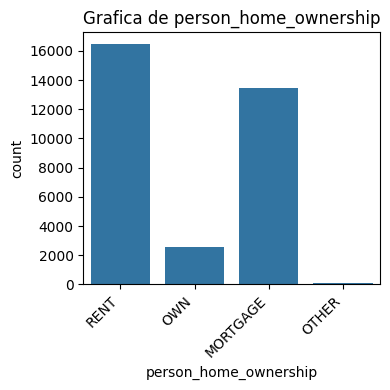

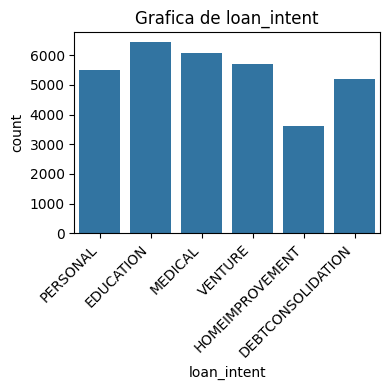

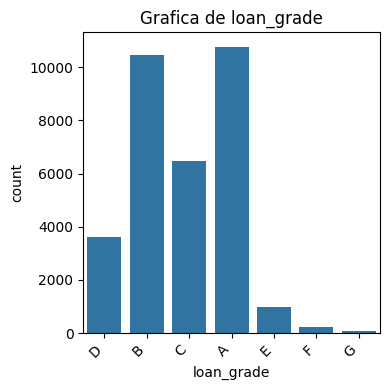

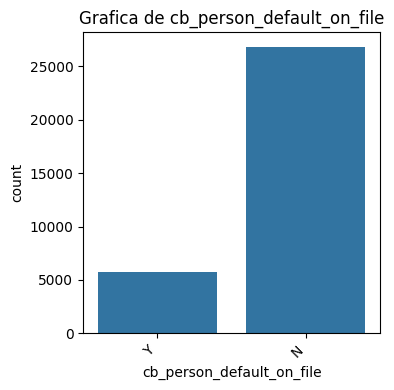

In [30]:
include = ['object']
text_cols = df.describe(include=include)

total_columns = text_cols.shape[1]

for i, col in enumerate(text_cols):
  plt.figure(figsize=(text_cols.shape))
  sns.countplot(x=col, data=df)
  plt.title(f'Grafica de {col}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

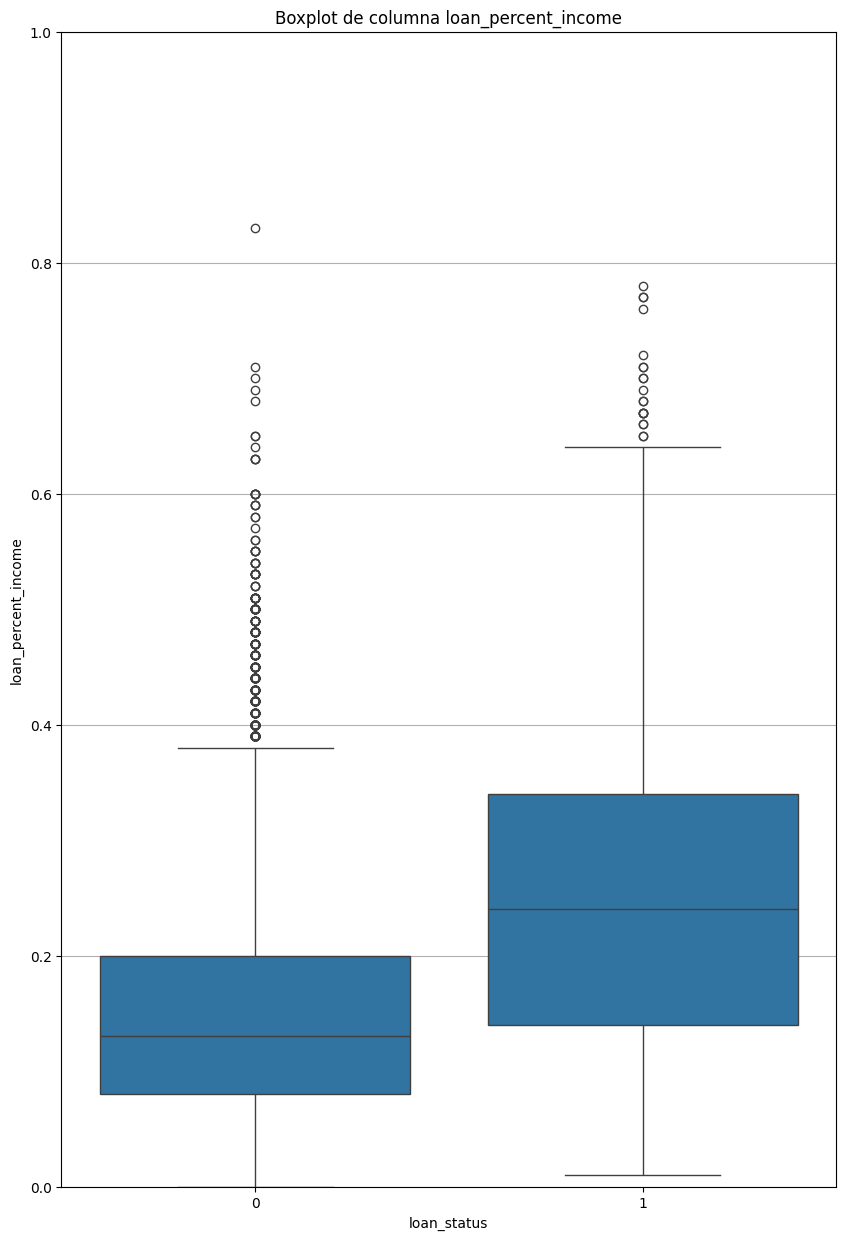

In [27]:
loan_percent_income = df['loan_percent_income']
loan_status = df['loan_status']

plt.figure(figsize=(10, 15))
sns.boxplot(x=loan_status, y=loan_percent_income, data=df)
plt.title(f'Boxplot de columna loan_percent_income')


plt.ylim([0, 1])
plt.grid(True, axis='y')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

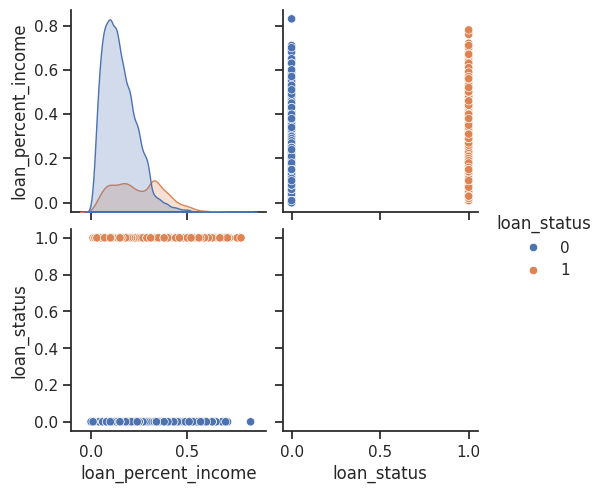

In [36]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['loan_percent_income', 'loan_status'], hue="loan_status")
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

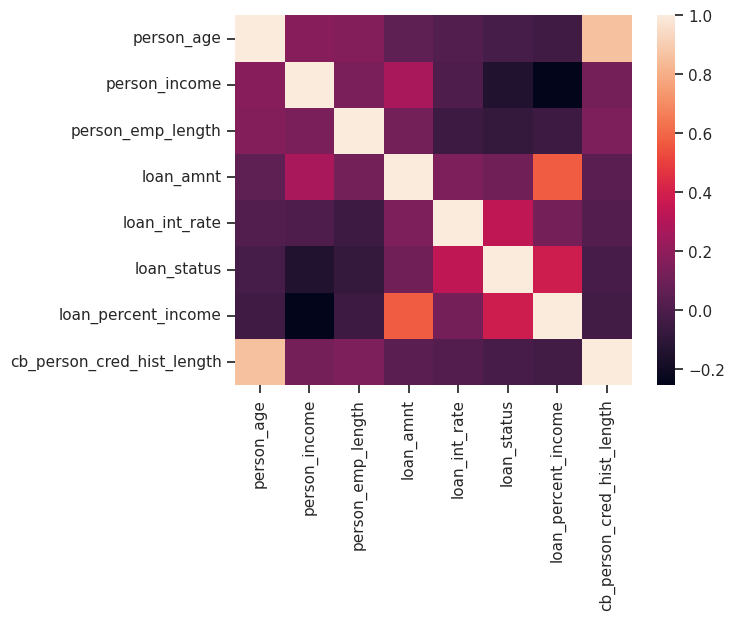

In [41]:
num_cols = df.select_dtypes(include=['float', 'int'])
correlation = num_cols.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)